In [1370]:
# import sys
# sys.path.insert(0, '/content/drive/My Drive/Colab/EI_conf/DeepLearn')

In [1371]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1372]:
from keras.models import Sequential
from keras.layers import Dense
from keras import activations
from keras import initializers
import numpy as np
import pandas as pd
import keras
from keras import layers
from keras import ops
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
 # fix random seed for reproducibility
np.random.seed(seed)
import matplotlib.pyplot as plt

In [1373]:
# X = np.load('X_total_ceew.npy')
X = np.load('Xmeterav_total_ceew.npy')
# X = np.load('/content/drive/My Drive/Colab/EI_conf/DeepLearn/X_total_ceew.npy')

In [1374]:
X2 = X.reshape((X.shape[0], X.shape[1], 1))
X2.shape

(84, 24, 1)

In [1375]:
# Y = np.zeros ((len(X),1))
# Y.shape
# l = 0
# for i in range (n_clusters):
#     for j in range (len(X[labels == i])):
#         Y[j+l] = i
#     l = l + len(X[labels ==i])

In [1376]:
np.random.seed(seed)
seed = 8
org_dim = 24
latent_dim = 8
int_dim = 32

input_ts = keras.Input(shape=(org_dim,))
encoded = Dense(int_dim, activation='relu')(input_ts)
encoded = Dense(latent_dim , activation='relu')(encoded)

decoded = Dense(int_dim, activation='relu')(encoded)
decoded = Dense (org_dim, activation ='relu')(decoded)

autoencoder = keras.Model(input_ts, decoded)
encoder = keras.Model(input_ts, encoded)

encoded_input = keras.Input(shape=(latent_dim ,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1](decoder_layer1(encoded_input))
decoder = keras.Model(encoded_input, decoder_layer2)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "functional_217"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_72 (InputLayer)     │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,144 (8.38 KB)

 Trainable params: 2,144 (8.38 KB)

 Non-trainable params: 0 (0.00 B)

In [1377]:
print (encoder.summary())

Model: "functional_219"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_72 (InputLayer)     │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,064 (4.16 KB)

 Trainable params: 1,064 (4.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1378]:
print (decoder.summary())

Model: "functional_221"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_73 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,080 (4.22 KB)

 Trainable params: 1,080 (4.22 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1379]:
history = autoencoder.fit(X2, X2, epochs=1000, batch_size=10)


Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1105
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1106 
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0735 
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703 
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0803 
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0644 
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0636 
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0642 
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0661 
Epoch 11/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0620 
Epoch 12/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0486 
Epoch 13/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0684 
Epoch 14/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0615 
Epoch 15/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 
Epoch

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 
Epoch 83/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 
Epoch 84/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208 
Epoch 85/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0221 
Epoch 86/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 
Epoch 87/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0238 
Epoch 88/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 
Epoch 89/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0228 
Epoch 90/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 91/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0267 
Epoch 92/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0261 
Epoch 93/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 
Epoch 94/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0233 
Epoch 95/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 
Epoch 96/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 
Epoch 97/

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0262 
Epoch 163/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207 
Epoch 164/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0247 
Epoch 165/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 
Epoch 166/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 
Epoch 167/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0194 
Epoch 168/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182 
Epoch 169/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 
Epoch 170/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217 
Epoch 171/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0233 
Epoch 172/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 
Epoch 173/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 
Epoch 174/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 
Epoch 175/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 
Epoch 176/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 
Epoch 243/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 
Epoch 244/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232 
Epoch 245/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249 
Epoch 246/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 
Epoch 247/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 248/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 249/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 
Epoch 250/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 
Epoch 251/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0198 
Epoch 252/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0173 
Epoch 253/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192 
Epoch 254/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0225 
Epoch 255/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223 
Epoch 256/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 323/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 324/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223 
Epoch 325/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0197 
Epoch 326/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 
Epoch 327/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 
Epoch 328/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 
Epoch 329/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 
Epoch 330/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 
Epoch 331/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213 
Epoch 332/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 
Epoch 333/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 
Epoch 334/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0198 
Epoch 335/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 336/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 
Epoch 403/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192 
Epoch 404/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 405/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 406/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180 
Epoch 407/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0226 
Epoch 408/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 
Epoch 409/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 410/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0210 
Epoch 411/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246 
Epoch 412/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 
Epoch 413/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 
Epoch 414/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 
Epoch 415/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182 
Epoch 416/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 
Epoch 483/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213 
Epoch 484/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 
Epoch 485/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 486/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 
Epoch 487/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0227 
Epoch 488/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 
Epoch 489/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0210 
Epoch 490/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0211 
Epoch 491/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192 
Epoch 492/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 
Epoch 493/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 494/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 
Epoch 495/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 
Epoch 496/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 
Epoch 563/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0222 
Epoch 564/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 
Epoch 565/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 
Epoch 566/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178 
Epoch 567/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 
Epoch 568/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 
Epoch 569/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 
Epoch 570/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177 
Epoch 571/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 572/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0144 
Epoch 573/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0171 
Epoch 574/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192 
Epoch 575/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 
Epoch 576/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 
Epoch 643/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212 
Epoch 644/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 
Epoch 645/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183 
Epoch 646/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 647/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192 
Epoch 648/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0194 
Epoch 649/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0172 
Epoch 650/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164 
Epoch 651/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0237 
Epoch 652/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0211 
Epoch 653/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227 
Epoch 654/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 
Epoch 655/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217 
Epoch 656/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0214 
Epoch 723/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 
Epoch 724/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 
Epoch 725/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0197 
Epoch 726/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 
Epoch 727/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 728/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0225 
Epoch 729/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180 
Epoch 730/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0214 
Epoch 731/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0221 
Epoch 732/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 733/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0176 
Epoch 734/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 
Epoch 735/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 
Epoch 736/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211 
Epoch 803/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 
Epoch 804/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0234 
Epoch 805/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0163 
Epoch 806/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 
Epoch 807/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0199 
Epoch 808/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 
Epoch 809/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0186 
Epoch 810/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187 
Epoch 811/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169 
Epoch 812/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 
Epoch 813/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0222 
Epoch 814/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 815/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182 
Epoch 816/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0167 
Epoch 883/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 
Epoch 884/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 885/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 
Epoch 886/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0227 
Epoch 887/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0165 
Epoch 888/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0186 
Epoch 889/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 890/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0171 
Epoch 891/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207 
Epoch 892/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0186 
Epoch 893/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 
Epoch 894/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0214 
Epoch 895/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 
Epoch 896/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180 
Epoch 963/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0251 
Epoch 964/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0222 
Epoch 965/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0194 
Epoch 966/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 
Epoch 967/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0173 
Epoch 968/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 
Epoch 969/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192 
Epoch 970/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 
Epoch 971/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 
Epoch 972/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0242 
Epoch 973/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0170 
Epoch 974/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0160 
Epoch 975/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0152 
Epoch 976/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

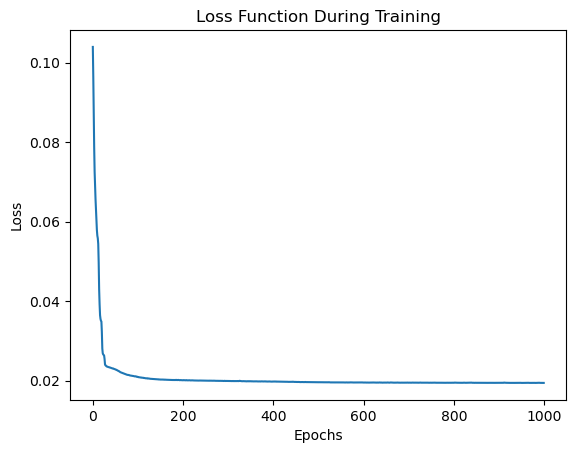

In [1380]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

In [1381]:
Z = autoencoder.predict(X,batch_size=None, verbose="auto", steps=None, callbacks=None)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [1384]:
L = encoder.predict(X2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [1385]:
L.shape

(84, 8)

0.039 --> 0.047 --> 
0.032 --> 0.043 --> 
0.023 --> 0.035 --> 
Resumed because of empty cluster
0.020 --> 0.031 --> 
Resumed because of empty cluster
0.017 --> 0.028 --> 


Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters - KMeans')

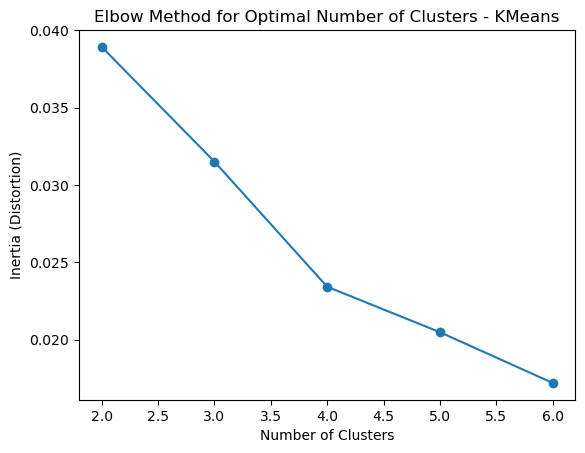

In [1386]:
X_normalized  = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(L)
cluster_range = range(2, 7)
inertia_values = []

for n_clusters in cluster_range:
    ks = KShape(n_clusters=n_clusters, verbose=True, random_state=0)
    ks_cluster_assignments = ks.fit_predict(X_normalized )
    labels = ks.labels_
    inertia_values.append(ks.inertia_)
    
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal Number of Clusters - KMeans')
# plt.savefig("elbow_autokshape_lp.pdf", format='pdf', bbox_inches='tight')

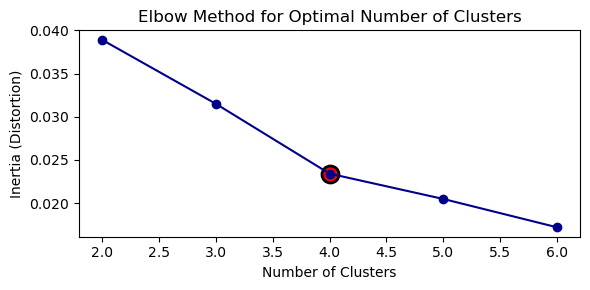

In [1388]:
fig, axs = plt.subplots(1, 1, figsize=(6,3))

# Plotting Inertia values
axs.plot(cluster_range, inertia_values, marker='o', color='darkblue')
axs.scatter(4, inertia_values[2], color='red', s=150, edgecolors='black', linewidths=2)  # Highlighting the point
axs.set_xlabel('Number of Clusters')
axs.set_ylabel('Inertia (Distortion)')
axs.set_title('Elbow Method for Optimal Number of Clusters')
axs.grid(False)

# # Plotting Loss Function During Training
# axs[1].plot(history.history['loss'], color='darkred')
# axs[1].set_xlabel('Epochs')
# axs[1].set_ylabel('Loss')
# axs[1].set_title('Loss Function During Training')
# axs[1].grid(False)

plt.tight_layout()
plt.savefig("elbow.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [1389]:
X_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(L)
n_clusters =4
ks = KShape(n_clusters=n_clusters, verbose=True, random_state=0)
ks_cluster_assignments = ks.fit_predict(X_scaled)
ks.cluster_centers_.shape
labels = ks.labels_

0.023 --> 0.035 --> 


In [1390]:
X2a = X_scaled

In [1391]:
for i in range(n_clusters):
    num_points_in_cluster = len(X_scaled[ks_cluster_assignments == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 2 data points
Cluster 1: 14 data points
Cluster 2: 28 data points
Cluster 3: 40 data points


In [1392]:
ks.cluster_centers_.shape

(4, 8, 1)

In [1393]:
cluster_assignments_scaled = ks_cluster_assignments

In [1394]:
ks_cluster_centers = ks.cluster_centers_
cluster_centers_scaled = ks_cluster_centers.reshape(n_clusters,latent_dim)
cluster_centers_scaled = decoder.predict(cluster_centers_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [1395]:
xc = ks_cluster_centers
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

In [1396]:
# plt.figure(figsize=(8,4))

# colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

# for i in range(n_clusters):
#     ax = plt.subplot(1, n_clusters, i+1)
#     cluster_label = f'Cluster-{i}'
#     ax.set_title(cluster_label, fontsize=14)
    
#     X2b = X2a.reshape((X2a.shape[0], X2a.shape[1]))

    
#     x1 = X2b[labels == i]
#     x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
#     x4 = x2.mean(axis=1)
    
#     ax.set_xlabel('Hour of the day', fontsize=12)
#     if i == 0:
#         ax.set_ylabel('Load in kWh (normalized)', fontsize=14)  # Add ylabel only for the leftmost plot
# #     ax.set_ylim(0, 5)
    
#     plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
# #     plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
#     plt.grid(True, linestyle='--', alpha=0.5)
        
#     plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids

# plt.tight_layout()
# plt.savefig("latent_autokshape_cseg2.pdf", format='pdf', bbox_inches='tight')

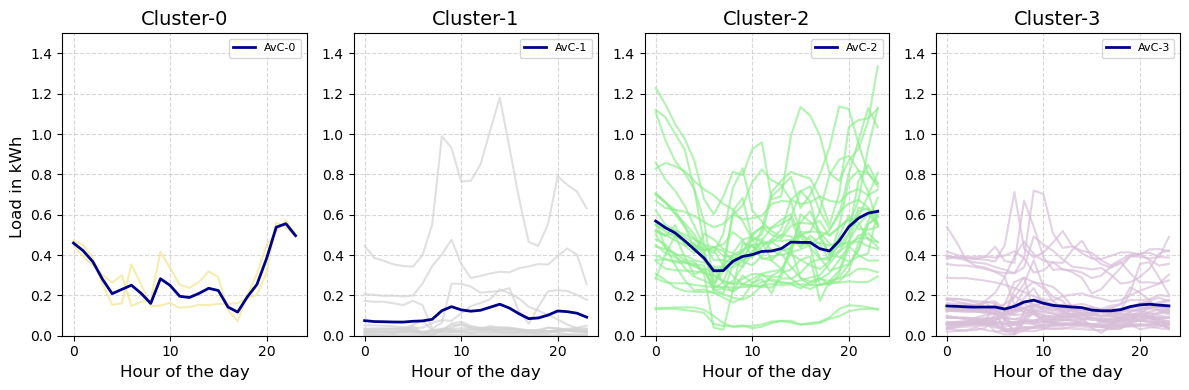

In [1397]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
    ax.set_ylim(0, 1.5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("aekshape_cseg_singlescale.pdf", format='pdf', bbox_inches='tight')

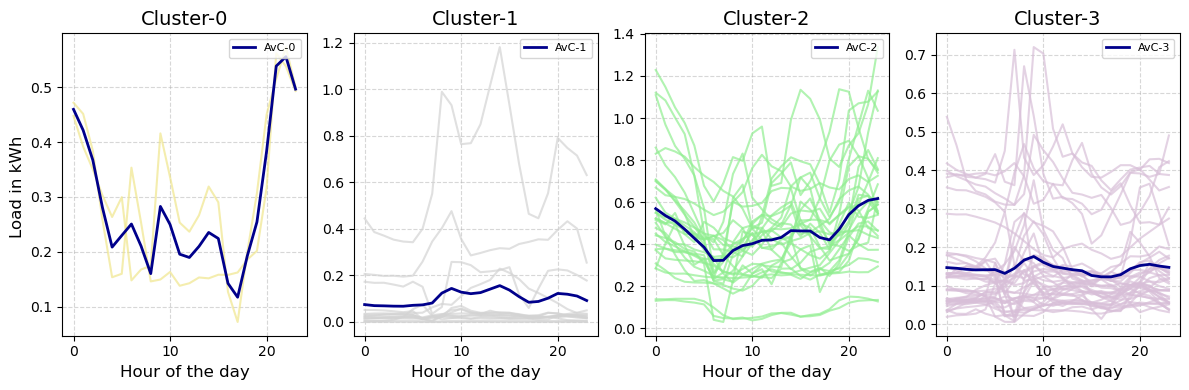

In [1398]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 1.5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("aekshape_cseg.pdf", format='pdf', bbox_inches='tight')

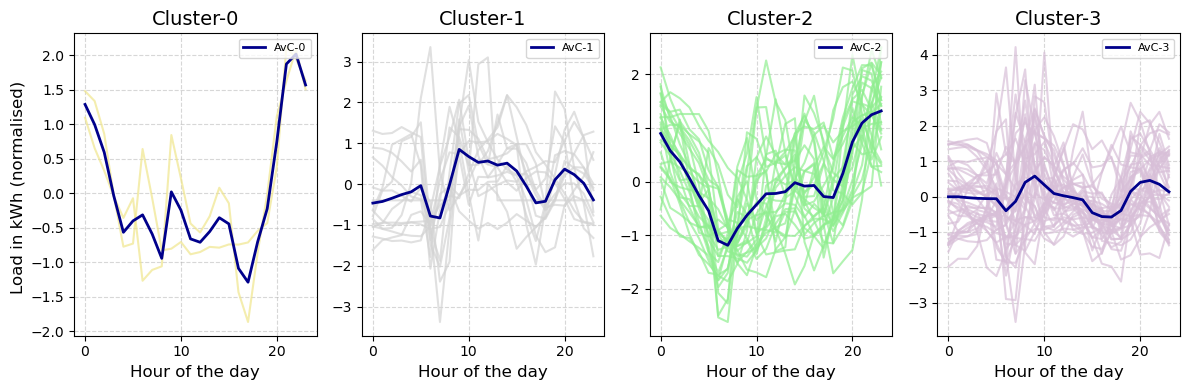

In [1399]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2 = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh (normalised) ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 4)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("norm_aekshape_cseg.pdf", format='pdf', bbox_inches='tight')

In [1400]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X[cluster_assignments_scaled == j], axis=1) 
#     peak_rlc = np.argmax(cluster_centers_scaled[j, :])
    peak_rlc = np.argmax(np.mean(X[cluster_assignments_scaled == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[cluster_assignments_scaled == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[cluster_assignments_scaled == j])
pms = pm/len(X)
print(pm, pms)
        

20.0 0.23809523809523808


In [1401]:
from sklearn.metrics import silhouette_score
silhouette_score(X, ks_cluster_assignments)

0.03477971553626106

In [1402]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
silhouette_score(X, ks_cluster_assignments, metric = dtw)  

-0.013933889301171424

In [1403]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, ks_cluster_assignments)

25.098835647596093

In [1404]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, ks_cluster_assignments)

2.8738439000539397

In [1405]:
X[labels==1].shape

(14, 24)

In [1406]:
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(np.mean(X[labels == j],axis=0), X[labels == j][i,:])
        
print(k)

30.679786546636034


In [1407]:
#PMS with mean

y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

20.0 0.23809523809523808


In [1408]:
dmd_pk = np.load('dmd_pk.npy')
from sklearn.metrics.pairwise import euclidean_distances


0 [[27.32898504]] 27.328985043545984 0.37521293349292995
1 [[26.10826102]] 26.10826102136922 0.01174749164443667
2 [[9.32805536]] 9.328055357052609 0.4028266290108069
3 [[17.51837695]] 17.51837695028429 0.17925213850929733


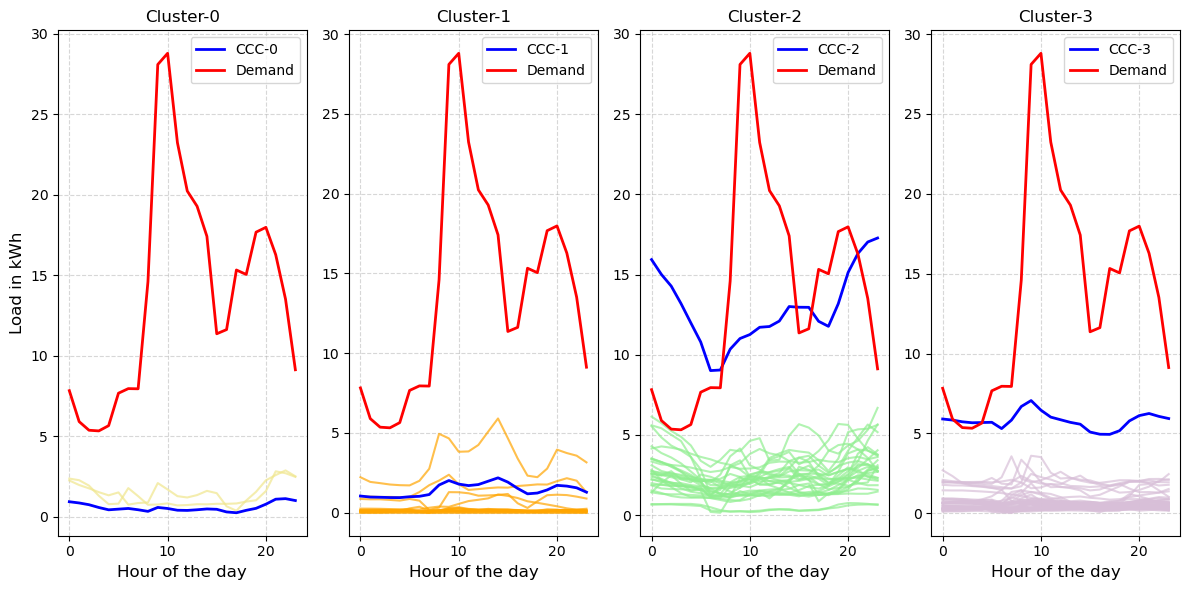

In [1409]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
plt.savefig("cc_aekshape.pdf", format='pdf', bbox_inches='tight')

plt.show()